In [ ]:
import torch
from torch import nn
from torch import optim

In [ ]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float)
X, y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [ ]:
#hidden layers 2개
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid(),
            nn.Linear(2,2),
            nn.Sigmoid(),
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = XOR()
model

XOR(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=2, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
def train(x, y, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad() #optimizer 초기화

        # forward
        hypothesis = model(x)

        # check loss
        error = loss_fn(hypothesis, y)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()

        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')

In [ ]:
train(X, y, epochs=20000, lr=0.2, model=model, every_print=1000)
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.6930480003356934
Epoch: 2000, loss: 0.6929649114608765
Epoch: 3000, loss: 0.6927715539932251
Epoch: 4000, loss: 0.692120373249054
Epoch: 5000, loss: 0.6872801780700684
Epoch: 6000, loss: 0.5661376714706421
Epoch: 7000, loss: 0.032184965908527374
Epoch: 8000, loss: 0.009721485897898674
Epoch: 9000, loss: 0.005502770654857159
Epoch: 10000, loss: 0.003791974624618888
Epoch: 11000, loss: 0.0028768128249794245
Epoch: 12000, loss: 0.002310419688001275
Epoch: 13000, loss: 0.0019266318995505571
Epoch: 14000, loss: 0.0016500984784215689
Epoch: 15000, loss: 0.0014416251797229052
Epoch: 16000, loss: 0.0012790284818038344
Epoch: 17000, loss: 0.0011488031595945358
Epoch: 18000, loss: 0.0010421954793855548
Epoch: 19000, loss: 0.000953370297793299
Epoch: 20000, loss: 0.0008782774675637484


(tensor([[9.3357e-04],
         [9.9896e-01],
         [9.9926e-01],
         [8.0012e-04]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [ ]:
for x in model.named_parameters():
    print(x)

('model.0.weight', Parameter containing:
tensor([[ 5.0629, -4.8229],
        [ 5.5597, -5.6119]], requires_grad=True))
('model.0.bias', Parameter containing:
tensor([ 2.3824, -3.1163], requires_grad=True))
('model.2.weight', Parameter containing:
tensor([[ 5.7263, -6.0702],
        [-4.4636,  4.5147]], requires_grad=True))
('model.2.bias', Parameter containing:
tensor([-2.5706,  2.0293], requires_grad=True))
('model.4.weight', Parameter containing:
tensor([[-10.4020,   7.6603]], requires_grad=True))
('model.4.bias', Parameter containing:
tensor([1.5453], requires_grad=True))


**최종 출력값 및 그래프 **

In [ ]:
import torch

# 주어진 파라미터 값
w0 = torch.tensor([[ 5.0629, -4.8229], [5.5597, -5.6119]])
b0 = torch.tensor([ 2.3824, -3.1163])
w2 = torch.tensor([[ 5.7263, -6.0702],[-4.4636,  4.5147]])
b2 = torch.tensor([-2.5706,  2.0293])
w4 = torch.tensor([[-10.4020,   7.6603]])
b4 = torch.tensor([1.5453])

# 입력 데이터
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

sigmoid = nn.Sigmoid()

# 첫 번째 은닉층의 출력 계산
layer1_output = sigmoid(X @ w0.T + b0)

# 두 번째 은닉층의 출력 계산
layer2_output = sigmoid(layer1_output @ w2.T + b2)

# 최종 출력 계산
sigmoid(layer2_output @ w4.T + b4)

tensor([[9.3354e-04],
        [9.9897e-01],
        [9.9926e-01],
        [8.0015e-04]])

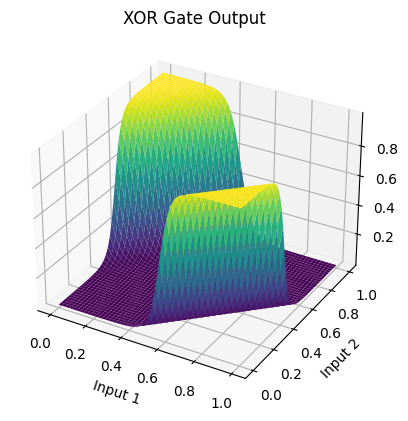

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 1)
        self.sigmoid3 = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        return out

xor_model = XOR()


# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[ 5.0629, -4.8229], [5.5597, -5.6119]])
xor_model.layer1.bias.data = torch.tensor([ 2.3824, -3.1163])
xor_model.layer2.weight.data = torch.tensor([[ 5.7263, -6.0702],[-4.4636,  4.5147]])
xor_model.layer2.bias.data = torch.tensor([-2.5706,  2.0293])
xor_model.layer3.weight.data = torch.tensor([[-10.4020,   7.6603]])
xor_model.layer3.bias.data = torch.tensor([1.5453])

# 3차원 그래프 생성을 위한 입력 데이터 정의
x_values_xor = np.linspace(0, 1, 50)
y_values_xor = np.linspace(0, 1, 50)
xx_xor, yy_xor = np.meshgrid(x_values_xor, y_values_xor)
xy_xor = np.column_stack([xx_xor.ravel(), yy_xor.ravel()])
xy_tensor_xor = torch.tensor(xy_xor, dtype=torch.float)

# 각 점에서의 예측값 계산
with torch.no_grad():
    predictions_xor = xor_model(xy_tensor_xor).numpy().reshape(xx_xor.shape)

# 면 그래프로 출력 시각화
fig = plt.figure()
ax_xor = fig.add_subplot(111, projection='3d')
ax_xor.plot_surface(xx_xor, yy_xor, predictions_xor, cmap='viridis')

ax_xor.set_xlabel('Input 1')
ax_xor.set_ylabel('Input 2')
ax_xor.set_zlabel('Output')
ax_xor.set_title('XOR Gate Output')
plt.show()
